In [51]:
"""
Library Imports 

"""
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


"""
Model Imports

"""

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

# Adding CNN model tools 
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense


# adding Eigenfaces
from sklearn.neural_network import MLPClassifier


"""
loading dataset from local directory 

"""
faces =np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")



In [52]:
"""
checking details of dataset by loading Faces and their labels 

"""
print(f"number of images = {len(faces)}")
print(f"unique image = {len(np.unique(labels))}")
print(f"image size is {faces.shape[1]} x {faces.shape[2]}")

number of images = 400
unique image = 40
image size is 64 x 64


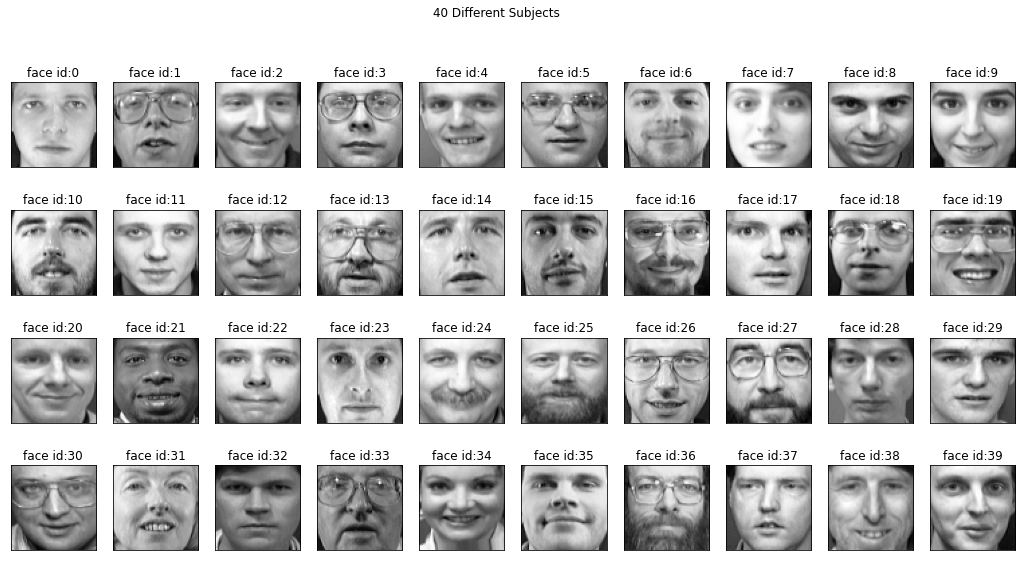

In [53]:
"""
Showing unique faces from dataset 
and found 40 different classes/faces 

"""

def display_people(images, unique_ids):
    #4 rows, 10 cloumns of size 18x9
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    
    #Assigning ID to subjects
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("40 Different Subjects")
    pass
display_people(faces, np.unique(labels))

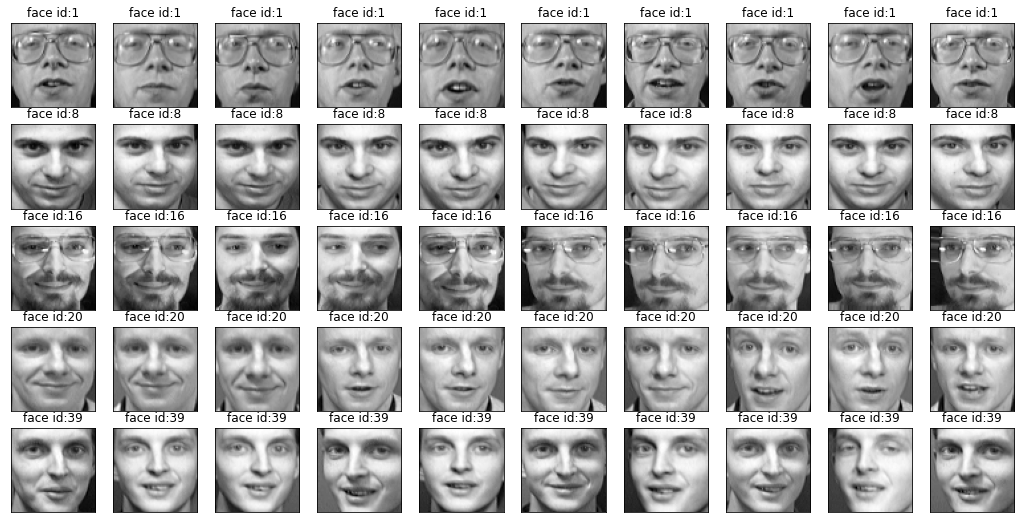

In [54]:
"""
Fetching 10 faces from each class
using 5 different classes passes array from calling function 

"""

def display_face(images, subject_ids):
    cols=10 #Cloumn for each subject's 10 pictures
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
            
            
#Displays 10 pictures of 5 difference subjects based on ID
display_face(images=faces, subject_ids=[1,8, 16, 20, 39]) 

In [55]:
"""
 Reshaping dataset 

"""

X=faces.reshape((faces.shape[0],faces.shape[1]*faces.shape[2]))
print("X shape:",X.shape)

X_train, X_test, y_train, y_test=train_test_split(X, labels, test_size=0.3, stratify=labels, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))


X shape: (400, 4096)
X_train shape: (280, 4096)
y_train shape:(280,)


In [56]:
"""
making  the classification process using 90 PCA components
initializing varibles from pca components 

"""

n_components=90
import time 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

### LDA MODEL RESULTS

========== LDA RESULT ==========
Accuracy score: 0.93
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
   

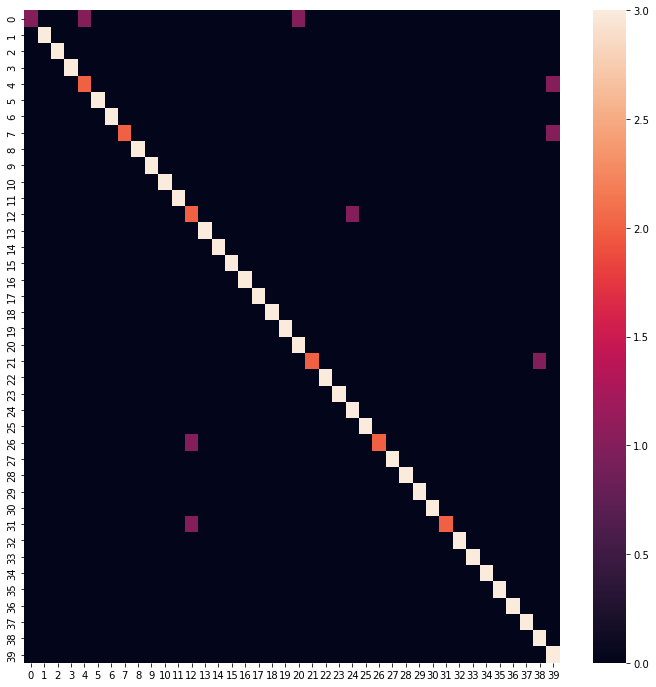

In [57]:

# name of model 
name = 'LDA'

# initialize object of LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
clf=model

# using train variables in respected model
clf.fit(X_train_pca, y_train)

# init the timer to start
t1 = time.time()

# start prediction 
y_pred=clf.predict(X_test_pca)

# adding confusion matrix results
cm=metrics.confusion_matrix(y_test, y_pred)

# print required output 
print(10*"=","{} Result".format(name).upper(),10*"=")
print("Accuracy score: {:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))
print()

# stop the timer and print the results
t2 = time.time() - t1

# draw confusion matrix output
plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)


print(f"Process time: {t2} seconds")

### LR MODEL RESULTS

========== LR RESULT ==========
Accuracy score: 0.93
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
    

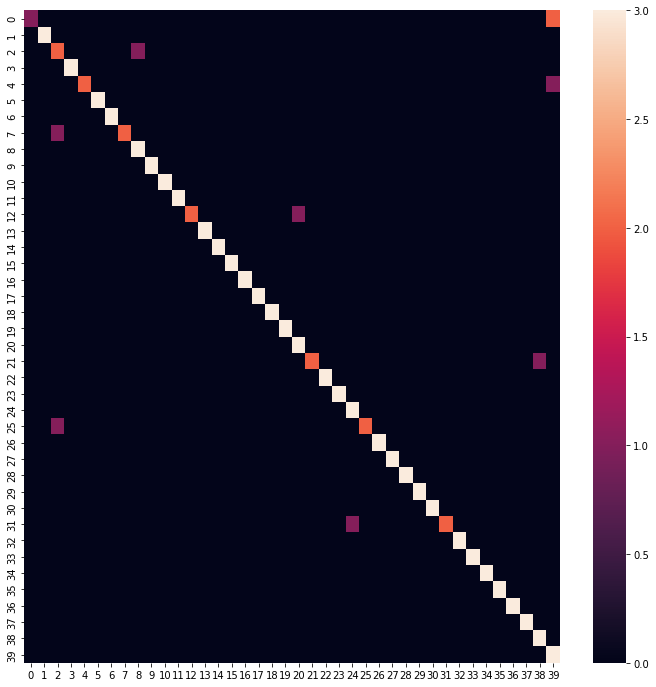

In [58]:
# name of model 
name = "LR"

# initialize object of LogisticRegression
model = LogisticRegression()
clf=model

# using train variables in respected model
clf.fit(X_train_pca, y_train)

# init the timer to start
t1 = time.time()

# start prediction 
y_pred=clf.predict(X_test_pca)

# adding confusion matrix results
cm=metrics.confusion_matrix(y_test, y_pred)


# print required output 
print(10*"=","{} Result".format(name).upper(),10*"=")
print("Accuracy score: {:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))
print()

# stop the timer and print the results
t2 = time.time() - t1

# draw confusion matrix output
plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)


print(f"Process time: {t2} seconds")

### NB MODEL RESULTS

========== NB RESULT ==========
Accuracy score: 0.86
Classification Results:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       0.33      0.67      0.44         3
           3       0.50      1.00      0.67         3
           4       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.60      1.00      0.75         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      0.67      0.80         3
          15       0.60      1.00      0.75         3
    

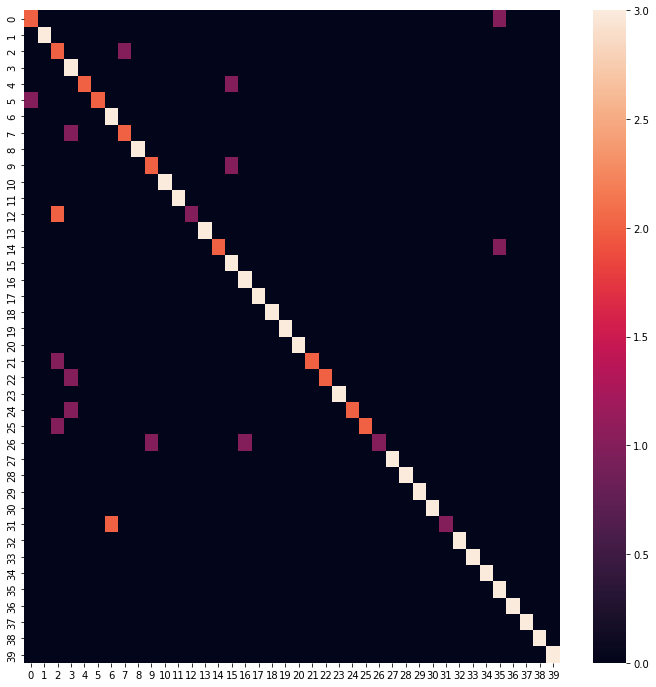

In [59]:
# name of model
name = "NB"

# initialize object of GaussianNB
model = GaussianNB()
clf=model

# using train variables in respected model
clf.fit(X_train_pca, y_train)

# init the timer to start
t1 = time.time()

# start prediction 
y_pred=clf.predict(X_test_pca)

# adding confusion matrix results
cm=metrics.confusion_matrix(y_test, y_pred)


# print required output 
print(10*"=","{} Result".format(name).upper(),10*"=")
print("Accuracy score: {:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))
print()

# stop the timer and print the results
t2 = time.time() - t1

# draw confusion matrix output
plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

print(f"Process time: {t2} seconds")

### KNN MODEL RESULTS

========== KNN RESULT ==========
Accuracy score: 0.70
Classification Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.67      0.80         3
           2       0.33      0.33      0.33         3
           3       0.67      0.67      0.67         3
           4       0.60      1.00      0.75         3
           5       0.25      0.67      0.36         3
           6       1.00      0.33      0.50         3
           7       1.00      0.67      0.80         3
           8       0.50      1.00      0.67         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       0.38      1.00      0.55         3
          15       1.00      0.33      0.50         3
   

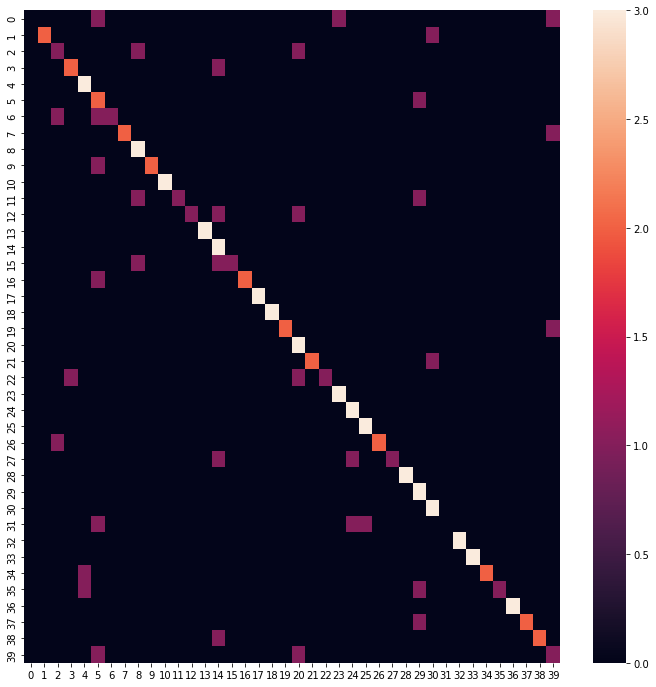

In [60]:


# name of model
name = "KNN"

# initialize object of KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
clf=model

# using train variables in respected model
clf.fit(X_train_pca, y_train)

# init the timer to start
t1 = time.time()

# start prediction 
y_pred=clf.predict(X_test_pca)

# adding confusion matrix results
cm=metrics.confusion_matrix(y_test, y_pred)


# print required output 
print(10*"=","{} Result".format(name).upper(),10*"=")
print("Accuracy score: {:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))
print()

# stop the timer and print the results
t2 = time.time() - t1

# draw confusion matrix output
plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

print(f"Process time: {t2} seconds")

### DT MODEL RESULTS

========== DT RESULT ==========
Accuracy score: 0.56
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         3
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         3
           4       1.00      0.67      0.80         3
           5       0.60      1.00      0.75         3
           6       0.20      0.33      0.25         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       0.67      0.67      0.67         3
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         3
          13       0.50      0.67      0.57         3
          14       0.67      0.67      0.67         3
          15       0.33      1.00      0.50         3
    

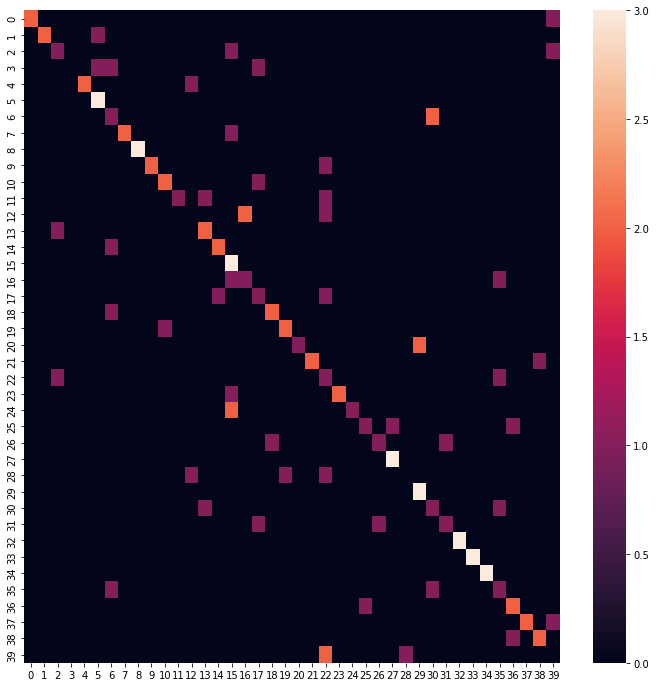

In [61]:

# name of model
name = "DT"

# initialize object of DecisionTreeClassifier
model = DecisionTreeClassifier()
clf=model

# using train variables in respected model
clf.fit(X_train_pca, y_train)

# init the timer to start
t1 = time.time()

# start prediction 
y_pred=clf.predict(X_test_pca)

# adding confusion matrix results
cm=metrics.confusion_matrix(y_test, y_pred)


# print required output 
print(10*"=","{} Result".format(name).upper(),10*"=")
print("Accuracy score: {:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))
print()

# stop the timer and print the results
t2 = time.time() - t1

# draw confusion matrix output
plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

print(f"Process time: {t2} seconds")

### SVM MODEL RESULTS

========== SVM RESULT ==========
Accuracy score: 0.92
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
   

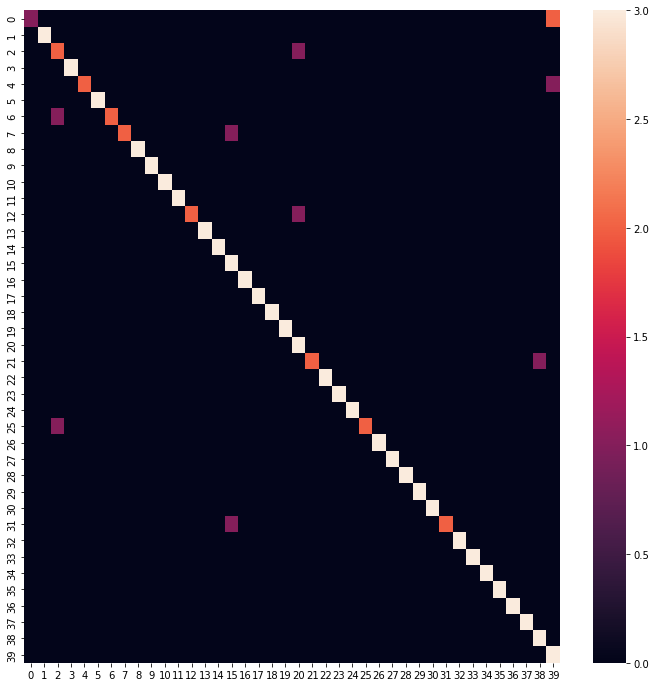

In [62]:
# name of model
name = "SVM"

# initialize object of SVC
model = SVC()
clf=model

# using train variables in respected model
clf.fit(X_train_pca, y_train)

# init the timer to start
t1 = time.time()

# start prediction 
y_pred=clf.predict(X_test_pca)

# adding confusion matrix results
cm=metrics.confusion_matrix(y_test, y_pred)


# print required output 
print(10*"=","{} Result".format(name).upper(),10*"=")
print("Accuracy score: {:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))
print()

# stop the timer and print the results
t2 = time.time() - t1

# draw confusion matrix output
plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

print(f"Process time: {t2} seconds")

### Eigenfaces/ MLPClassifier model results

Iteration 1, loss = 3.73669396
Validation score: 0.035714
Iteration 2, loss = 3.44737813
Validation score: 0.071429
Iteration 3, loss = 3.16505549
Validation score: 0.142857
Iteration 4, loss = 2.89010000
Validation score: 0.321429
Iteration 5, loss = 2.62298591
Validation score: 0.500000
Iteration 6, loss = 2.36452724
Validation score: 0.535714
Iteration 7, loss = 2.11603312
Validation score: 0.678571
Iteration 8, loss = 1.87876323
Validation score: 0.750000
Iteration 9, loss = 1.65451169
Validation score: 0.750000
Iteration 10, loss = 1.44499523
Validation score: 0.785714
Iteration 11, loss = 1.25144908
Validation score: 0.785714
Iteration 12, loss = 1.07482947
Validation score: 0.785714
Iteration 13, loss = 0.91561757
Validation score: 0.785714
Iteration 14, loss = 0.77403446
Validation score: 0.821429
Iteration 15, loss = 0.64973263
Validation score: 0.857143
Iteration 16, loss = 0.54203359
Validation score: 0.857143
Iteration 17, loss = 0.44982588
Validation score: 0.857143
Iterat

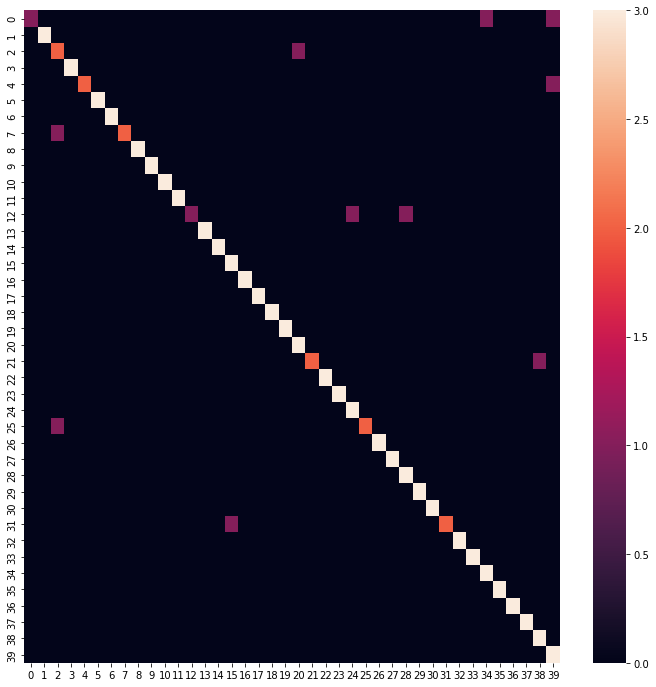

In [63]:
# name of model 
name = 'MLP'

# initialize object of MLPClassifier
model =  MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
clf=model

# using train variables in respected model
clf.fit(X_train_pca, y_train)

# init the timer to start
t1 = time.time()

# start prediction 
y_pred=clf.predict(X_test_pca)

# adding confusion matrix results
cm=metrics.confusion_matrix(y_test, y_pred)

# print required output 
print(10*"=","{} Result".format(name).upper(),10*"=")
print("Accuracy score: {:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))
print()

# stop the timer and print the results
t2 = time.time() - t1

# draw confusion matrix output
plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)


print(f"Process time: {t2} seconds")

### CNN / Sequencial Model Results

In [64]:
# loading seprate varibles for CNN to remove conflictions 

pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

Xdata = pics # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata

# Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.2, random_state=46)


In [65]:
# print all values 
print("pics: ", pics.shape)
print("labels: ", labels.shape)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

pics:  (400, 64, 64)
labels:  (400,)
x_train:  (320, 64, 64)
x_test:  (80, 64, 64)
y_train:  (320, 1)
y_test:  (80, 1)


In [66]:
# reshaping 
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


In [67]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

In [68]:
# Reshap for CNN
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)

x_train:  (320, 64, 64, 1)
x_test:  (80, 64, 64, 1)


In [69]:
# label encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

y_train_ = to_categorical(y_train, num_classes = 40) # 40 distinct people
y_test_ = to_categorical(y_test, num_classes = 40)

print("y_train_ shape: ",y_train_.shape)
print("y_test_ shape: ",y_test_.shape)

y_train_ shape:  (320, 40)
y_test_ shape:  (80, 40)


In [70]:
# create CNN model 

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau



model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 37
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

history = model.fit_generator(
                              datagen.flow(x_train,y_train_, batch_size=batch_size),
                              epochs = epoch, 
                              validation_data = (x_test,y_test_),
                              verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )
print(f"Process time: {t2} seconds")

Epoch 1/37
16/16 - 4s - loss: 4.7013 - accuracy: 0.0250 - val_loss: 3.6908 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 4s/epoch - 231ms/step
Epoch 2/37
16/16 - 3s - loss: 3.6906 - accuracy: 0.0156 - val_loss: 3.6920 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 3s/epoch - 180ms/step
Epoch 3/37
16/16 - 3s - loss: 3.7039 - accuracy: 0.0219 - val_loss: 3.6936 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 3s/epoch - 178ms/step
Epoch 4/37

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
16/16 - 3s - loss: 3.6860 - accuracy: 0.0281 - val_loss: 3.7355 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 3s/epoch - 177ms/step
Epoch 5/37
16/16 - 3s - loss: 3.6971 - accuracy: 0.0219 - val_loss: 3.6959 - val_accuracy: 0.0000e+00 - lr: 7.0000e-04 - 3s/epoch - 183ms/step
Epoch 6/37
16/16 - 3s - loss: 3.6837 - accuracy: 0.0406 - val_loss: 3.6864 - val_accuracy: 0.0000e+00 - lr: 7.0000e-04 - 3s/epoch - 182ms/step
Epoch 7/37
16/16 - 3s - loss: 3.6611 - accuracy: 0.0375 - val_loss: 3.6574 - val_

3/3 [==============================] - 0s 26ms/step
========== CNN RESULT ==========
Accuracy score: 0.96
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         2
     

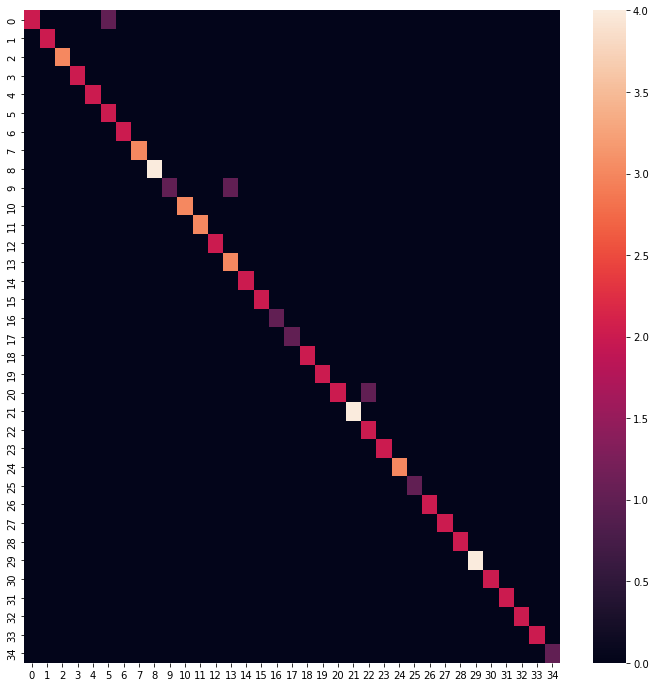

In [71]:
name = "CNN"
t1 = time.time()

#predict_x=model.predict(X_test) 
#classes_x=np.argmax(predict_x,axis=1)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = y_test.reshape(-1,)

diff = y_test - y_pred
diff = diff.reshape(-1,1)

true = 0
for i in range(0,len(diff)):
    if diff[i] == 0:
        true = true + 1

Cnn_accuracy = round(100*true/len(diff),2)

# adding confusion matrix results
cm=metrics.confusion_matrix(y_test, y_pred)

# print required output 
print(10*"=","{} Result".format(name).upper(),10*"=")
print("Accuracy score: {:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))
print()

# stop the timer and print the results
t2 = time.time() - t1

# draw confusion matrix output
plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

print(f"Process time: {t2} seconds")